<h1 style='text-align: center;'> Chi-Cuadrada </h1>

In [1]:
import random
import numpy as np
import pandas as pd
import plotly.express as px
from IPython.display import display, Markdown

Realice un programa que permita calcular el valor de Chi-Cuadrada y genere la gráfica de distribución de los 100 primeros números pseudo-aleatorios generados por los métodos de cuadrados medios y productos medios.

Emplee el siguiente nivel de significancia α=0.05

Las semillas para generar los números son las siguientes:
1. Cuadrados medios: Xo=74731897457, D=7
2. Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19
3. Tausworthe: q = 7, r = 3, l = 5
4. Random de Python: seed = 11052022

La gráfica deberá analizar las distribuciones generadas por ambos métodos y compararlas con la ideal.

In [2]:
# Funciones generales
def calculate_chi(list_random):
    table = {}
    for i in np.arange(0.1, 1.1, 0.1):
        for j in list_random:
            if j > i - 0.1 and j <= i:
                if round(i - 0.1, 1) in table:
                    table[round(i - 0.1, 1)] = table[round(i - 0.1, 1)] + 1
                else:
                    table[round(i-0.1,1)] = 1
                
    N = len(list_cuadrados_medios)
    n = np.sqrt(N)
    E = N / n
    sum_chi = round(sum([(value - E) ** 2 / E for value in table.values()]), 2)
    
    return convert_dataframe(table), sum_chi

def convert_dataframe(table):
    return pd.DataFrame(table.items(), columns=['Rango', 'Frecuencia'])

def generate_chart_bar(dataframe_table, title):
    fig = px.bar(dataframe_table, x="Rango", y="Frecuencia", height=400)
    fig.update_layout(title_text=f'Chi-Cuadrada - {title}', title_x=0.5)
    fig.update_xaxes(type='category')
    fig.show('png')

### Cuadrados Medios

**El valor de Chi-Cuadrada es:** 9.2

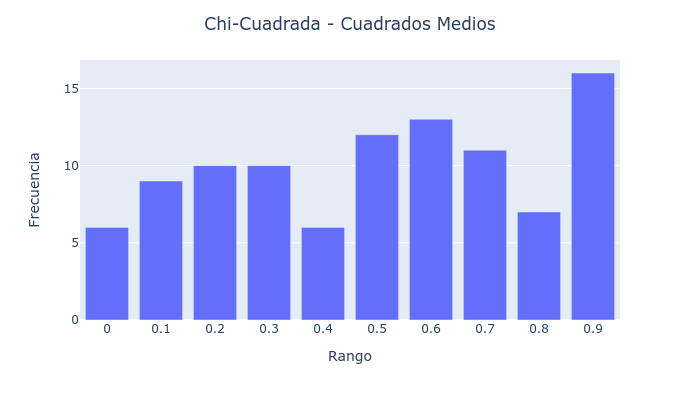

In [3]:
# Generación de números aleatorios
list_cuadrados_medios = []
xo = 74731897457
digitos = 7
iterations = 100

xn = xo
for i in range(iterations):
    xnn = xn**2
    txnn = str(xnn).zfill(8)
    tam = len(txnn)
    ui = int(txnn[int(tam/2 - digitos/2):int(tam/2 + digitos/2)])
    rn = ui/(int('9'*digitos) + 1)
    list_cuadrados_medios.append(rn)
    xn = ui

# Calcular Chi-Cuadrada
table, sum_chi = calculate_chi(list_cuadrados_medios)
display(Markdown(''))
display(Markdown(f'**El valor de Chi-Cuadrada es:** {sum_chi}'))
generate_chart_bar(table, 'Cuadrados Medios')

### Congruencia Lineal

**El valor de Chi-Cuadrada es:** 31.7

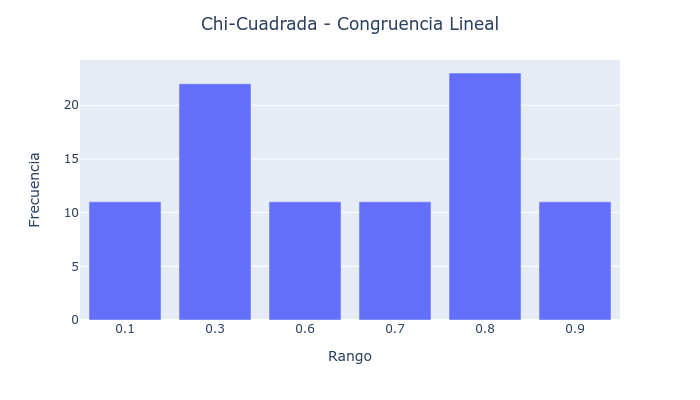

In [4]:
# Generación de números aleatorios
list_congruencia_lineal = []
a = 74731897457
b = 37747318974
x0 = 7
m = 19
iterations = 100

xn = x0
for i in range(iterations):
    xnn = (a*xn+b)%m
    ui = xnn/m
    list_congruencia_lineal.append(ui)
    xn = xnn
    
# Calcular Chi-Cuadrada
table, sum_chi = calculate_chi(list_congruencia_lineal)
display(Markdown(''))
display(Markdown(f'**El valor de Chi-Cuadrada es:** {sum_chi}'))
generate_chart_bar(table, 'Congruencia Lineal')

### Tausworthe

**El valor de Chi-Cuadrada es:** 2.5

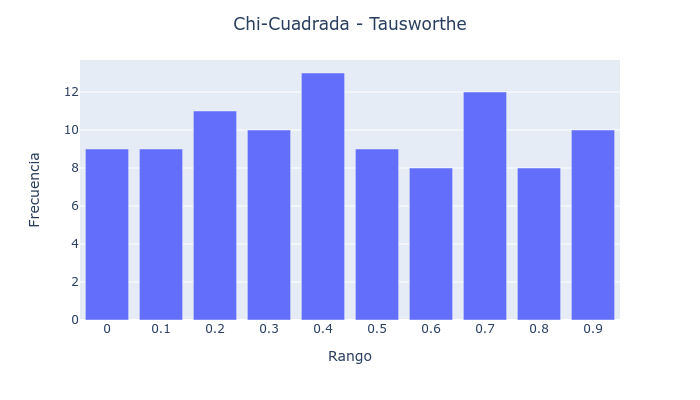

In [5]:
# Generación de números aleatorios
q = 7
r = 3
l = 5
length = 100
n_decimal = 3
list_tausworthe = []

def convert(bits):
    res = 0
    for index, bit in enumerate(bits):
        res += bit * np.power(2, (len(bits) - index - 1))
    return res

length_bit = length * l
B = np.ones(length_bit)

for i in range(q, length_bit):
    new_bit = 1 if B[i - r] != B[i - q] else 0
    B[i] = new_bit

B = np.array_split(B, length)
list_tausworthe = np.array(
            [
                round(convert(seg) / np.power(2, l), n_decimal)
                for seg in B
            ]
        )

# Calcular Chi-Cuadrada
table, sum_chi = calculate_chi(list_tausworthe)
display(Markdown(''))
display(Markdown(f'**El valor de Chi-Cuadrada es:** {sum_chi}'))
generate_chart_bar(table, 'Tausworthe')

### Random de Python

**El valor de Chi-Cuadrada es:** 17.8

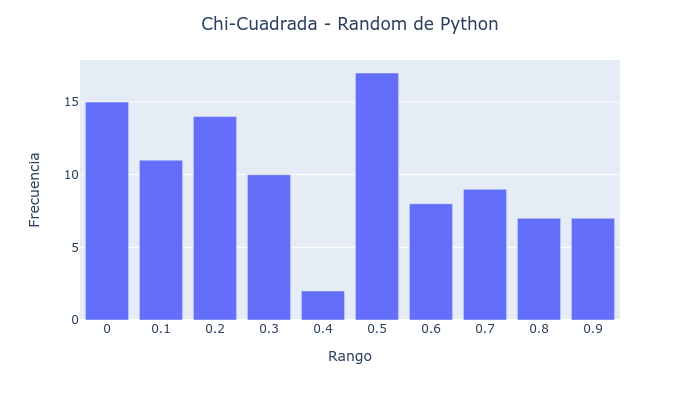

In [6]:
# Generación de números aleatorios
list_random_python = []
iterations = 100
seed = 11052022

random.seed(seed)
for _ in range(iterations):
    list_random_python.append(random.random())

# Calcular Chi-Cuadrada
table, sum_chi = calculate_chi(list_random_python)
display(Markdown(''))
display(Markdown(f'**El valor de Chi-Cuadrada es:** {sum_chi}'))
generate_chart_bar(table, 'Random de Python')